In [119]:
import os
os.environ['OMP_NUM_THREADS'] = '8'

In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [123]:
# Load Spotify dataset (Unsupervised)
spotify_df = pd.read_csv("SpotifyFeatures.csv")

# Load Billboard dataset (Supervised)
hot100_df = pd.read_csv("Hot100.csv")


In [125]:
# Spotify Dataset
print("Spotify Dataset Overview")
print("Shape (rows, columns):", spotify_df.shape)
print("\nColumn data types:")
print(spotify_df.dtypes)
print("\nNull values in each column:")
print(spotify_df.isnull().sum())

# Step 2: Automatically detect non-numeric (object or string) columns
categorical_cols_spotify = spotify_df.select_dtypes(include='object').columns
print("\n Possible Categorical Columns in Spotify:")
print(list(categorical_cols_spotify))

# Step 3: Check how many unique values in each of these
print("\n Unique Values in These Columns:")
print(spotify_df.nunique())

Spotify Dataset Overview
Shape (rows, columns): (232725, 18)

Column data types:
genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

Null values in each column:
genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      

In [127]:
# Hot100 Dataset
print("Hot100 Dataset Overview")
print("Shape (rows, columns):", hot100_df.shape)
print("\n Column data types:")
print(hot100_df.dtypes)
print("\n Null values in each column:")
print(hot100_df.isnull().sum())

# Step 2: Automatically detect non-numeric columns
categorical_cols_hot100 = hot100_df.select_dtypes(include='object').columns
print("\n Possible Categorical Columns in Hot100:")
print(list(categorical_cols_hot100))

# Step 3: Check unique values
print("\n Unique Values in These Columns:")
print(hot100_df.nunique())

Hot100 Dataset Overview
Shape (rows, columns): (620, 18)

 Column data types:
Track                object
Artist               object
Album                object
Year                  int64
Duration              int64
Time_Signature        int64
Danceability        float64
Energy              float64
Key                   int64
Loudness            float64
Mode                  int64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Popularity            int64
dtype: object

 Null values in each column:
Track               0
Artist              0
Album               0
Year                0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0


In [129]:
# Drop row with missing track_name
spotify_df = spotify_df.dropna(subset=['track_name'])

In [131]:
hot100_df['Popularity'].describe()

count    620.000000
mean      66.985484
std       13.698394
min        0.000000
25%       60.000000
50%       69.000000
75%       77.000000
max       98.000000
Name: Popularity, dtype: float64

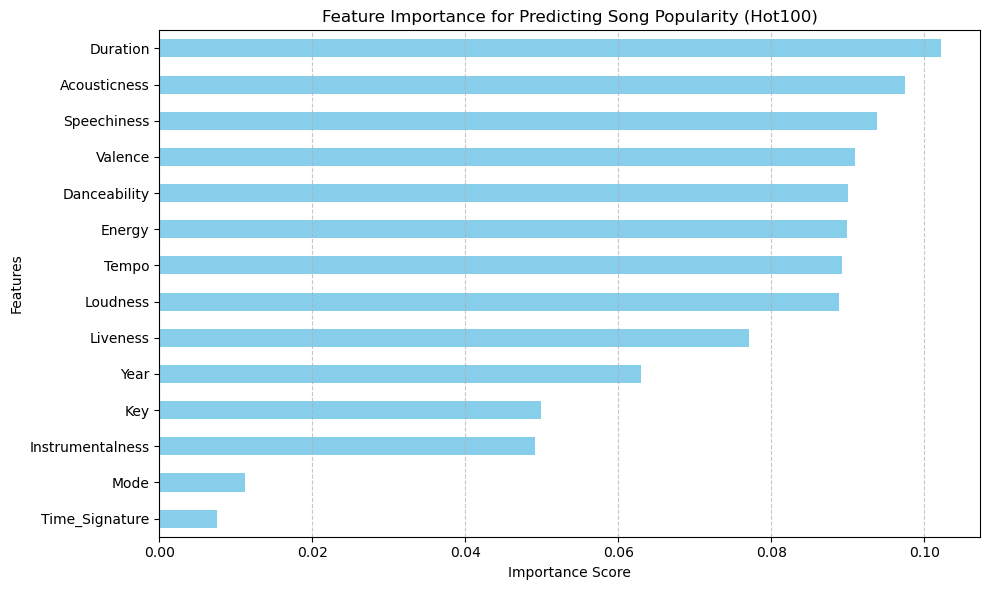

In [133]:
# Step 2: Define features (include all potentially useful numeric ones)
feature_columns = [
    'Danceability', 'Energy', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
    'Loudness', 'Year', 'Duration', 'Mode', 'Key', 'Time_Signature'
]

# Step 3: Extract X and y
X = hot100_df[feature_columns]

# Convert 'Popularity' into binary classes (1 = high popularity)
popularity_median = hot100_df['Popularity'].median()
y = (hot100_df['Popularity'] >= popularity_median).astype(int)

# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 6: Fit Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Get feature importance
importances = pd.Series(rf_model.feature_importances_, index=feature_columns)
importances_sorted = importances.sort_values(ascending=True)

# Step 8: Plot
plt.figure(figsize=(10, 6))
importances_sorted.plot(kind='barh', color='skyblue')
plt.title("Feature Importance for Predicting Song Popularity (Hot100)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [208]:
hot100_selected_features = [
    'Danceability', 'Energy', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
    'Loudness', 'Year', 'Duration', 'Key'  
]


In [210]:
X_hot100 = hot100_df[hot100_selected_features]
y = (hot100_df['Popularity'] >= hot100_df['Popularity'].median()).astype(int)


In [212]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [216]:
spotify_selected_features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
]

X_spotify = spotify_df[spotify_selected_features]


In [218]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_spotify_scaled = scaler.fit_transform(X_spotify)


Unsupervised

3.1 Clustering Methodology

In [222]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


3.3 Model Evaluation

#Elbow Method

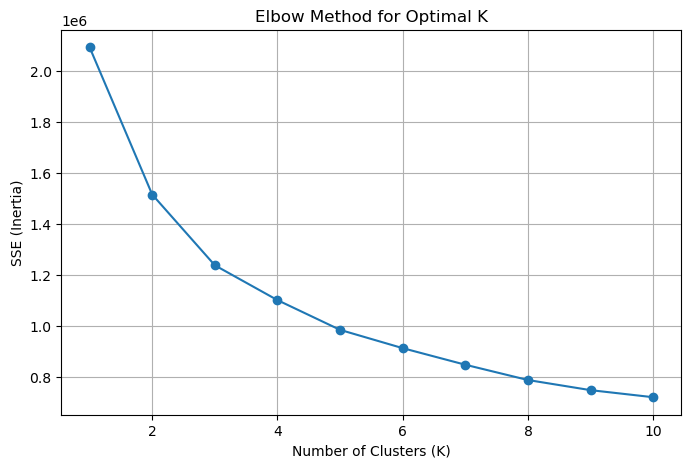

In [226]:
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_spotify_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


#Silhouette Score

In [228]:
import random

sample_indices = random.sample(range(len(X_spotify_scaled)), 2000)
df_sample = X_spotify_scaled[sample_indices]

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42 , n_init=10)
    preds = kmeans.fit_predict(df_sample)
    score = silhouette_score(df_sample, preds)
    print(f'Silhouette Score for k={k}: {score:.4f}')


Silhouette Score for k=2: 0.3439
Silhouette Score for k=3: 0.3775
Silhouette Score for k=4: 0.2376
Silhouette Score for k=5: 0.2020


3.4 Final KMeans Clustering (K=3)

In [230]:
kmeans_final = KMeans(n_clusters=3, random_state=42 , n_init=10)
cluster_labels = kmeans_final.fit_predict(X_spotify_scaled)


3.5 PCA for 2D Visualization

In [232]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_spotify_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels


3.6 Visualization

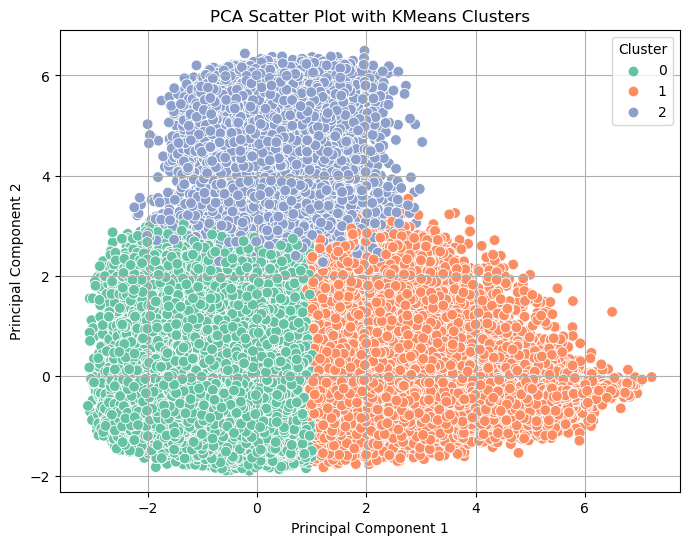

In [235]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('PCA Scatter Plot with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


3.7 Cluster Interpretation

In [237]:
# Add cluster labels to numeric data
spotify_df['Cluster'] = cluster_labels

# Group by clusters and get average values
cluster_summary = spotify_df.groupby('Cluster')[spotify_selected_features].mean()
cluster_summary


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Cluster,,,,,,,,,
0,0.200539,0.612675,0.677964,0.065420,0.199434,-6.938802,0.097028,122.425852,0.531746
1,0.822820,0.367039,0.212512,0.441002,0.164690,-17.485691,0.050743,106.264408,0.217745
2,0.783803,0.562365,0.660834,0.001492,0.727112,-11.960247,0.867065,98.397242,0.416038


3.8 Feature Importance (Random Forest)

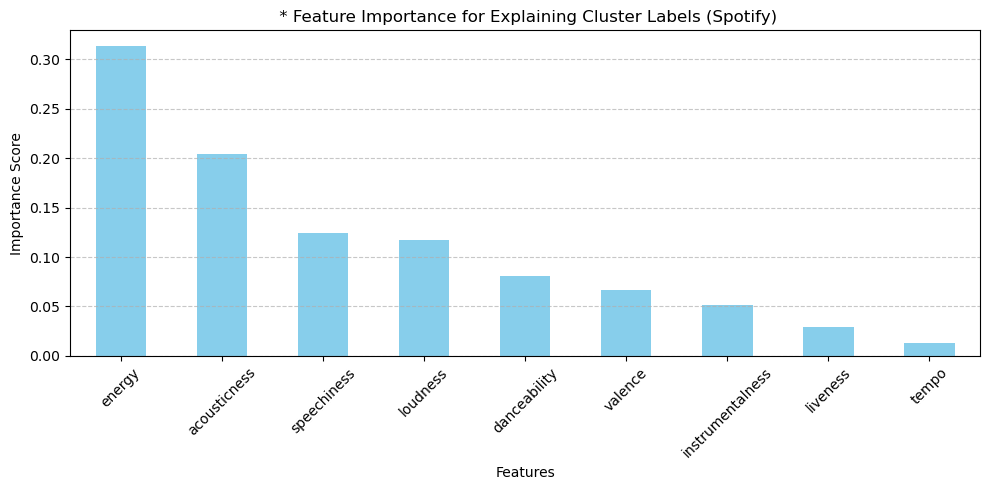

In [239]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Define X and y
X = spotify_df[spotify_selected_features]              # 9 numeric audio features
y = spotify_df['Cluster'].astype(int)                  # Ensure cluster labels are integer (not object or float)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 5))
importances_sorted.plot(kind='bar', color='skyblue')
plt.title(" * Feature Importance for Explaining Cluster Labels (Spotify)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


3.9 SHAP analysis

In [241]:

!pip install shap

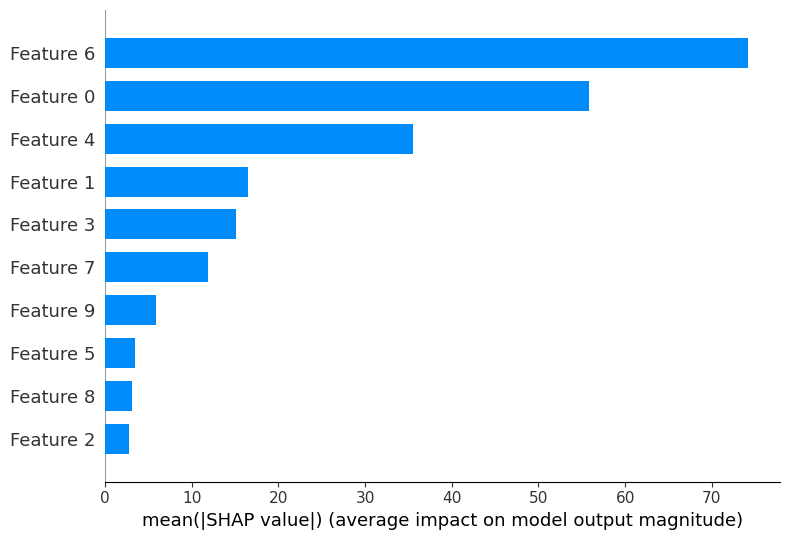

In [243]:
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# For demonstration,create a simple synthetic dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Now create the SHAP explainer with the trained model
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)  # Using the entire dataset for SHAP values

# Create the summary plot
shap.summary_plot(shap_values, X, plot_type="bar")


supervised

logistic regression 

In [248]:
# Import required library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select features and target
features = [
    'Danceability', 'Energy', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
    'Loudness', 'Year', 'Duration', 'Key'
]

X = hot100_df[features]
y = (hot100_df['Popularity'] >= hot100_df['Popularity'].median()).astype(int)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict on test set
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]


In [249]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate Logistic Regression
print("📊 Logistic Regression Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1 Score :", f1_score(y_test, y_pred_log))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_log))


📊 Logistic Regression Performance:
Accuracy : 0.5483870967741935
Precision: 0.5972222222222222
Recall   : 0.6142857142857143
F1 Score : 0.6056338028169014
ROC-AUC  : 0.5613756613756613


decision tree 

In [251]:
# Import the model
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]


In [252]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate Decision Tree
print("📊 Decision Tree Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1 Score :", f1_score(y_test, y_pred_dt))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_dt))


📊 Decision Tree Performance:
Accuracy : 0.5403225806451613
Precision: 0.5915492957746479
Recall   : 0.6
F1 Score : 0.5957446808510638
ROC-AUC  : 0.5314814814814814


Random Forest 

In [254]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


In [255]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate Random Forest
print("📊 Random Forest Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_rf))


📊 Random Forest Performance:
Accuracy : 0.5967741935483871
Precision: 0.625
Recall   : 0.7142857142857143
F1 Score : 0.6666666666666666
ROC-AUC  : 0.5834656084656085


support Vector Machine ( SVM )  

In [257]:
# Import the model
from sklearn.svm import SVC

# Create and train the SVM model (with probability=True for ROC-AUC)
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]


In [260]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate SVM
print("📊 Support Vector Machine (SVM) Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall   :", recall_score(y_test, y_pred_svm))
print("F1 Score :", f1_score(y_test, y_pred_svm))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_svm))


📊 Support Vector Machine (SVM) Performance:
Accuracy : 0.6370967741935484
Precision: 0.6712328767123288
Recall   : 0.7
F1 Score : 0.6853146853146853
ROC-AUC  : 0.6566137566137568


Model Performance Metrics comparesion 

In [262]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Build the comparison table
comparison_results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_svm)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_svm)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_svm)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_proba_log),
        roc_auc_score(y_test, y_proba_dt),
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_svm)
    ]
}

# Convert to DataFrame and display
results_df = pd.DataFrame(comparison_results)
print("🔍 Model Performance Comparison Table:")
display(results_df)


🔍 Model Performance Comparison Table:


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.548387,0.597222,0.614286,0.605634,0.561376
1,Decision Tree,0.540323,0.591549,0.600000,0.595745,0.531481
2,Random Forest,0.596774,0.625000,0.714286,0.666667,0.583466
3,SVM,0.637097,0.671233,0.700000,0.685315,0.656614


4.4 Visualizations`
Include a bar chart of model performance.

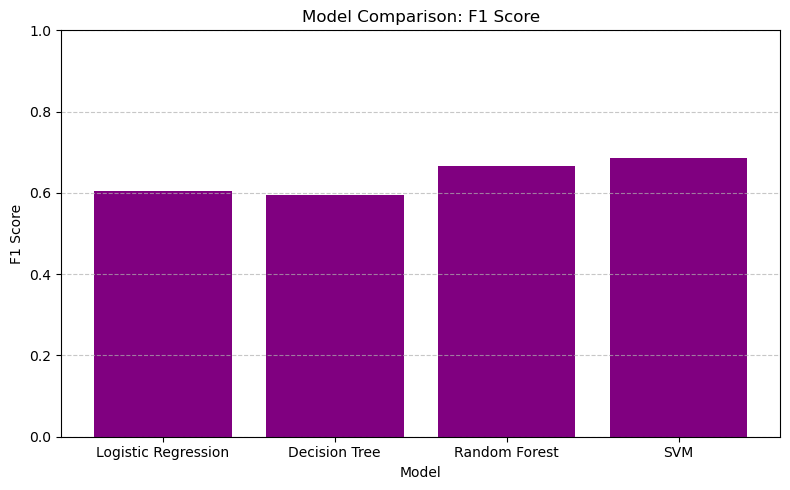

In [264]:
import matplotlib.pyplot as plt

# Extract F1 Scores from the results_df you already built
f1_scores = results_df["F1 Score"]
models = results_df["Model"]

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, f1_scores, color='purple')
plt.title("Model Comparison: F1 Score")
plt.ylabel("F1 Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


5.3 Feature Importance Bar Chart (Random Forest)

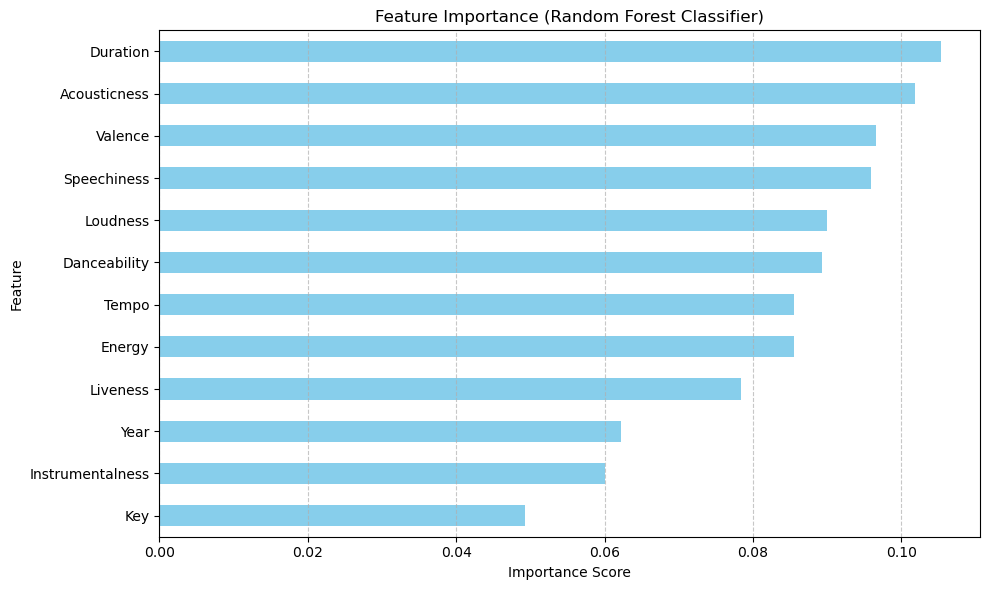

In [266]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
feature_names = [
    'Danceability', 'Energy', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
    'Loudness', 'Year', 'Duration', 'Key'
]

# Create Series and sort
importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
importance_series.plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Random Forest Classifier)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
